In [1]:
!pip install z3-solver

In [2]:
from z3 import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x,y,z,a,b,c=z3.Ints('x y z a b c')
x+y

x + y

In [7]:
solve(x**2+y**2==z**2,x>0,y>0,z>0,z>=1000)

[x = 1023, z = 1025, y = 64]


In [8]:
n=16
Q=[Int(f'Q_{i}') for i in range(n)]
C1=[
    And(Q[i]!=Q[j],
        Abs(Q[i]-Q[j])!=Abs(i-j))
          for i in range(n)
          for j in range(n)
            if i!=j
]

C2=[
    And(0<=Q[i],
        Q[i]<n)
      for i in range(n)
]

solve(*C1,*C2)

[Q_3 = 15,
 Q_9 = 4,
 Q_10 = 12,
 Q_8 = 11,
 Q_14 = 13,
 Q_5 = 5,
 Q_0 = 14,
 Q_2 = 7,
 Q_13 = 3,
 Q_15 = 6,
 Q_12 = 0,
 Q_1 = 10,
 Q_7 = 8,
 Q_4 = 1,
 Q_11 = 9,
 Q_6 = 2]


<Figure size 640x480 with 0 Axes>

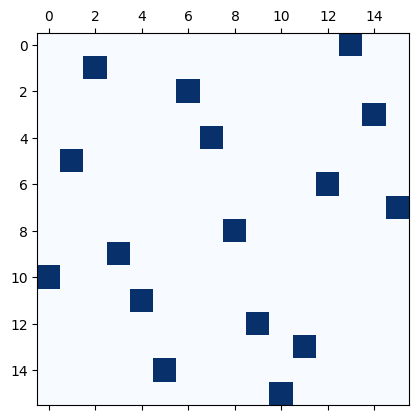

In [12]:
s=Solver()
s.add(*C1,*C2)
s.check()

board=np.zeros((n,n))
for i in range(n):
  board[i][s.model().evaluate(Q[i]).as_long()]=1

plt.figure()
plt.matshow(board,cmap='Blues')
plt.show()

